In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt

In [2]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

visitsItems = pd.read_sql('SELECT * FROM VisitsItems', con=db_connection)
visitsItems['created'] = pd.to_datetime(visitsItems['created'], unit='s')
visitsItems['lastmodified'] = pd.to_datetime(visitsItems['lastmodified'], unit='s')
visitsItems['deleted'].replace(0, np.nan, inplace=True)
visitsItems['deleted'] = pd.to_datetime(visitsItems['deleted'], unit='s')
# visitsItems['processed'].replace(0, np.nan, inplace=True)
visitsItems['title'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
visitsItems['description'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
visitsItems['title'] = visitsItems['title'].astype('category')
visitsItems['description'] = visitsItems['description'].astype('category')

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 1000)

In [10]:
visitsItems

,id,user_id,action_id,tool_id,bundle_id,refers_to_id,refers_to_uid,title,description,created,lastmodified
0,793451,0,1,0,793449,1,18356743,own Charles Dawes name well aftermath,different James Monroe feel just carpenter,2014-10-23 16:25:55,2014-10-23 16:25:55
1,793453,0,2,9,793449,1,18146475,great John C. Breckinridge have very achieve,other Walter Mondale talk when picture,2014-10-23 16:26:15,2014-10-23 16:26:15
2,793455,0,2,6,793449,1,18311851,first John C. Calhoun think only fuel,old Al Gore walk too year,2014-10-23 16:26:55,2014-10-23 16:26:55
3,793459,3,2,7,793449,1,18476565,early Henry A. Wallace call out wrist,good John F. Kennedy tell also government,2014-10-23 16:27:59,2014-10-23 16:27:59
4,793495,3,2,7,793449,1,18628929,same Hubert Humphrey kick very health,next Joe Biden come when creature,2014-10-23 19:36:56,2014-10-23 19:36:56
...,...,...,...,...,...,...,...,...,...,...,...
18479553,132873405,0,2,12,132777661,0,1595449503,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:25:03,2020-07-22 20:25:03
18479554,132873409,28814,2,12,132777661,0,1595449610,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:26:50,2020-07-22 20:26:50
18479555,132873413,28814,2,12,132777661,0,1595449666,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:27:46,2020-07-22 20:27:46
18479556,132873417,28814,2,3,132777661,0,1595450275,My Wallpaper,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:37:55,2020-07-22 20:37:55


In [11]:
visitsItems.info()
#total items collected and created during visits: 18,479,558 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18479558 entries, 0 to 18479557
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int64         
 1   user_id        int64         
 2   action_id      int64         
 3   tool_id        int64         
 4   bundle_id      int64         
 5   refers_to_id   int64         
 6   refers_to_uid  int64         
 7   title          category      
 8   description    category      
 9   created        datetime64[ns]
 10  lastmodified   datetime64[ns]
dtypes: category(2), datetime64[ns](2), int64(7)
memory usage: 1.3 GB


In [12]:
visitsItems = visitsItems.drop(['deleted', 'status_id', 'processed', 'input_id'], axis=1)

KeyError: "['deleted' 'status_id' 'processed' 'input_id'] not found in axis"

In [13]:
visitsItems

,id,user_id,action_id,tool_id,bundle_id,refers_to_id,refers_to_uid,title,description,created,lastmodified
0,793451,0,1,0,793449,1,18356743,own Charles Dawes name well aftermath,different James Monroe feel just carpenter,2014-10-23 16:25:55,2014-10-23 16:25:55
1,793453,0,2,9,793449,1,18146475,great John C. Breckinridge have very achieve,other Walter Mondale talk when picture,2014-10-23 16:26:15,2014-10-23 16:26:15
2,793455,0,2,6,793449,1,18311851,first John C. Calhoun think only fuel,old Al Gore walk too year,2014-10-23 16:26:55,2014-10-23 16:26:55
3,793459,3,2,7,793449,1,18476565,early Henry A. Wallace call out wrist,good John F. Kennedy tell also government,2014-10-23 16:27:59,2014-10-23 16:27:59
4,793495,3,2,7,793449,1,18628929,same Hubert Humphrey kick very health,next Joe Biden come when creature,2014-10-23 19:36:56,2014-10-23 19:36:56
...,...,...,...,...,...,...,...,...,...,...,...
18479553,132873405,0,2,12,132777661,0,1595449503,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:25:03,2020-07-22 20:25:03
18479554,132873409,28814,2,12,132777661,0,1595449610,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:26:50,2020-07-22 20:26:50
18479555,132873413,28814,2,12,132777661,0,1595449666,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:27:46,2020-07-22 20:27:46
18479556,132873417,28814,2,3,132777661,0,1595450275,My Wallpaper,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:37:55,2020-07-22 20:37:55


In [14]:
visitsItems['user_id'].value_counts()

0        18382285
247         13555
15424         525
8258          514
8319          502
           ...   
25670           1
25693           1
25710           1
25702           1
16360           1
Name: user_id, Length: 1469, dtype: int64

In [16]:
visitsItems['bundle_id'].value_counts()

1526919      9361
1586155      3962
107642771    1050
91825435     1048
103049787     958
             ... 
127266275       1
92398213        1
109462129       1
86368409        1
110250457       1
Name: bundle_id, Length: 543828, dtype: int64

In [132]:
visitsItems['action_id'].dropna().count()
#total items collected +created 18,479,555

18479555

In [3]:
visitsItems['refers_to_uid'].value_counts()
#most popular items

18703475      63766
18703473      63236
18703477      60335
18703503      59366
35460287      57847
              ...  
1479847166        1
1433945443        1
1438621080        1
1491252797        1
1439308042        1
Name: refers_to_uid, Length: 411500, dtype: int64

# user_id == 0

In [15]:
visitsItems_zero = visitsItems[visitsItems['user_id'] == 0]

In [39]:
visitsItems_zero

,id,user_id,action_id,tool_id,bundle_id,refers_to_id,refers_to_uid,title,description,created,lastmodified
0,793451,0,1,0,793449,1,18356743,own Charles Dawes name well aftermath,different James Monroe feel just carpenter,2014-10-23 16:25:55,2014-10-23 16:25:55
1,793453,0,2,9,793449,1,18146475,great John C. Breckinridge have very achieve,other Walter Mondale talk when picture,2014-10-23 16:26:15,2014-10-23 16:26:15
2,793455,0,2,6,793449,1,18311851,first John C. Calhoun think only fuel,old Al Gore walk too year,2014-10-23 16:26:55,2014-10-23 16:26:55
10,793573,0,2,9,793571,1,18651455,large George Bush rinse there railway,same Spiro Agnew want as kitten,2014-10-24 15:05:35,2014-10-24 15:05:35
15,793683,0,2,7,793681,1,18344241,first Benjamin Harrison ask also afterthought,other Andrew Jackson promise still faucet,2014-10-25 00:02:37,2014-10-25 00:02:37
...,...,...,...,...,...,...,...,...,...,...,...
18479545,132806723,0,1,0,132806719,1,18165899,NaN,NaN,2019-12-16 21:46:24,2020-07-09 13:12:38
18479546,132806731,0,1,0,132806727,1,18165899,NaN,NaN,2019-12-16 21:46:24,2020-07-09 13:16:52
18479547,132806739,0,1,0,132806735,1,18165899,NaN,NaN,2019-12-16 21:46:24,2020-07-09 13:20:09
18479550,132873389,0,2,16,132794701,0,1595447918,My Vase,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 19:58:38,2020-07-22 19:58:38


In [40]:
visitsItems_zero['id'].value_counts().count() / visitsItems['id'].value_counts().count() * 100
# 99.5 percentage were never attached to an account

99.47363451122064

## average items per user w/o user==0

In [66]:
visitsItems_not_zero = visitsItems[visitsItems['user_id'] != 0]
visitsItems_not_zero_and_action1 = visitsItems_not_zero[visitsItems_not_zero['action_id'] == 1]

In [69]:
visitsItems_action1 = visitsItems[visitsItems['action_id'] == 1]

In [73]:
group_visit_items= visitsItems_action1.groupby(['user_id']).agg('sum')
group_visit_items.reset_index(inplace=True)
group_visit_count = group_visit_items[['user_id', 'action_id']]
group_visit_count.sort_values(by="action_id", ascending=False, inplace=True)
group_visit_count['action_id'].median()
#with user zero but median to try to work with rugh edges that they add.

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


40.0

In [75]:
group_visit_items= visitsItems_not_zero_and_action1.groupby(['user_id']).agg('sum')
group_visit_items.reset_index(inplace=True)
group_visit_count = group_visit_items[['user_id', 'action_id']]
group_visit_count.sort_values(by="action_id", ascending=False, inplace=True)
group_visit_count['action_id'].mean()
#without user 0 

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


74.14592933947773

# action_id

In [3]:
visit_action = visitsItems['action_id'].value_counts()
visit_action= visit_action.to_frame()
visit_action = visit_action.rename({'action_id':'value'},axis=1)
visit_action.reset_index(inplace=True)
visit_action = visit_action.rename({'index':'action_id'},axis=1)

In [4]:
visit_action
# 0 = collected
# 1 = created

,action_id,value
0,1,18096960
1,2,382598


No handles with labels found to put in legend.


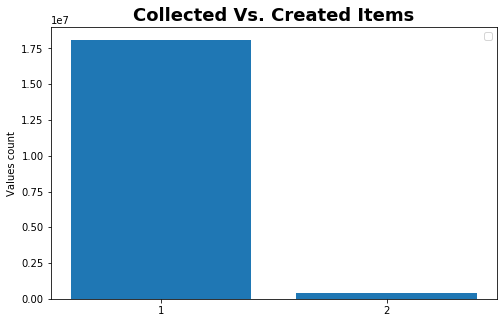

In [5]:
plt.figure(figsize=(8,5))
plt.bar(visit_action['action_id'], visit_action['value'])
plt.title('Collected Vs. Created Items', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.xticks(visit_action['action_id'])
plt.legend()
plt.show()
# plt.savefig('created_vs_collected_bar.png', dpi=300)

<Figure size 576x360 with 0 Axes>

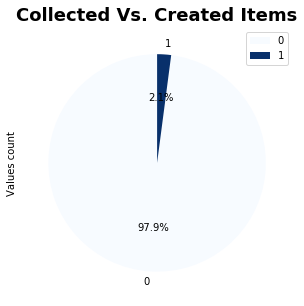

In [27]:
plt.figure(figsize=(8,5))
visit_action.plot.pie(x=visit_action['action_id'], y='value', figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues')
plt.title('Collected Vs. Created Items', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
# plt.xlabel('action_id')
# plt.xticks(visit_action['action_id'])
# plt.legend()
plt.show()
# plt.savefig('created_vs_collected.png', dpi=300)

# Tools_id

In [52]:
visit_tools= visitsItems['tool_id'].value_counts()
visit_tools
# Tool IDs
# The tool_id field refers to the interactive application that created the row. 
#A tool_id of 0 means that the Pen was used to collect an object from one of our wall labels.
# The other non-wall-label tools are as follows:
# 1 = Sketchbot
# 3 = Immersion Room
# 4 = Wallpaper Photo
# 5 = Body Scan
# 6 = Process Lab
# 7 = Revolve
# 8 = Extrude
# 9 = Pattern
# 10 = Building
# 11 = Hat
# 12 = Table
# 13 = Lamp
# 14 = Chair
# 15 = Freeform
# 16 = Vase
# 17 = Wild Ideas
#from https://github.com/cooperhewitt/the-pen-data

0     18097261
3        87588
10       50871
14       50392
12       46477
11       41273
13       41037
16       30331
15       26279
1         5430
6         2047
17         536
7           15
9           12
8            5
5            2
4            2
Name: tool_id, dtype: int64

In [78]:
visit_tools= visit_tools.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [59]:
visit_tools.rename({'tool_id': 'value'}, axis=1, inplace=True)

In [60]:
visit_tools.reset_index(inplace=True)

In [61]:
visit_tools.rename({'index': 'tool_id'}, axis=1, inplace=True)

In [74]:
visitsItems[visitsItems['tool_id'] == 0]

,id,user_id,action_id,tool_id,bundle_id,refers_to_id,refers_to_uid,title,description,created,lastmodified
0,793451,0,1,0,793449,1,18356743,own Charles Dawes name well aftermath,different James Monroe feel just carpenter,2014-10-23 16:25:55,2014-10-23 16:25:55
16,793693,3,2,0,793681,1,18382315,good John C. Calhoun drop how vein,few Ulysses S. Grant allow here picture,2014-10-25 00:11:54,2014-10-25 00:11:54
23,793723,3,2,0,793715,1,18800613,big Dick Cheney end when company,new Grover Cleveland be here beginner,2014-10-25 00:41:49,2014-10-25 00:41:49
25,793883,0,1,0,793881,1,18316213,own Grover Cleveland tell still wren,good Jimmy Carter hug well mountain,2014-10-27 17:55:04,2014-10-27 17:55:04
26,793885,0,2,0,793881,1,18495173,bad Charles Dawes zip there veil,new George Clinton itch here stranger,2014-10-27 17:55:22,2014-10-27 17:55:22
...,...,...,...,...,...,...,...,...,...,...,...
18479543,132777687,0,1,0,132777683,1,18165899,NaN,NaN,2019-12-16 21:46:24,2020-07-02 20:22:39
18479544,132794705,0,1,0,132794701,1,18165899,NaN,NaN,2019-12-16 21:46:24,2020-07-06 17:42:37
18479545,132806723,0,1,0,132806719,1,18165899,NaN,NaN,2019-12-16 21:46:24,2020-07-09 13:12:38
18479546,132806731,0,1,0,132806727,1,18165899,NaN,NaN,2019-12-16 21:46:24,2020-07-09 13:16:52


<BarContainer object of 17 artists>

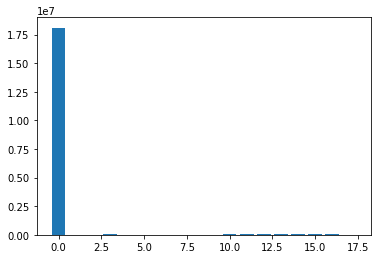

In [49]:
plt.bar(visit_tools['tool_id'], visit_tools['value'])

In [83]:
visit_tools['Perc'] = (visit_tools['value'] / 18479558) *100
visit_tools

,tool_id,value,Perc
0,0,18097261,97.931244
1,3,87588,0.473972
2,10,50871,0.275283
3,14,50392,0.272691
4,12,46477,0.251505
5,11,41273,0.223344
6,13,41037,0.222067
7,16,30331,0.164133
8,15,26279,0.142206
9,1,5430,0.029384


<Figure size 576x360 with 0 Axes>

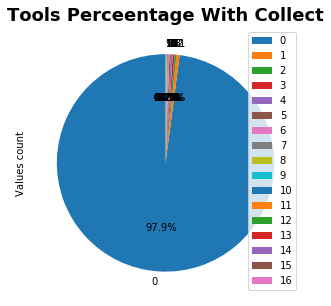

In [107]:
plt.figure(figsize=(8,5))
visit_tools.plot.pie(y='value', figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.title('Tools Percentage With Collect', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()
plt.show()
# plt.savefig('tools_per.png', dpi=300)

In [97]:
visit_tools_no_zero = visit_tools[visit_tools['tool_id']!= 0]
visit_tools_no_zero = visit_tools_no_zero.drop('Perc', axis=1)

No handles with labels found to put in legend.


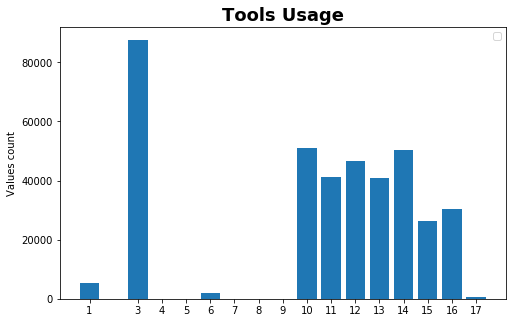

In [104]:
plt.figure(figsize=(8,5))
plt.bar(visit_tools_no_zero['tool_id'], visit_tools_no_zero['value'])
plt.title('Tools Usage', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.xticks(visit_tools_no_zero.tool_id)
plt.legend()
plt.show()
# plt.savefig('tools_id.png', dpi=300)

# how many collected per year

In [31]:
visitsItems = visitsItems[visitsItems['created'] > '2010']
visitsItems_by_year = visitsItems['created'].groupby(visitsItems.created.dt.to_period("Y")).agg('count')

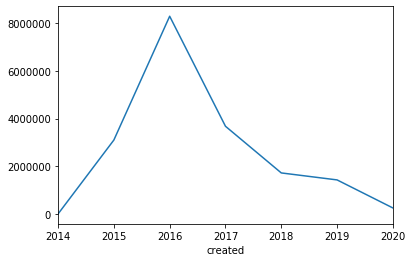

In [32]:
visitsItems_by_year.plot()

In [33]:
visitItems_by_date = visitsItems[['action_id', 'created']]
visitItems_by_date['created']= visitItems_by_date['created'].dt.to_period("Y")
visitItems_by_date = visitItems_by_date.groupby(['action_id', 'created']).size()

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
visitItems_by_date= visitItems_by_date.to_frame()

In [35]:
visitItems_by_date = visitItems_by_date.rename({'0': 'count_of_action'}, axis=1)

In [36]:
visitItems_by_date

0
action_id created         
1         2014        1144
          2015     3001333
          2016     8159269
          2017     3598896
          2018     1688401
          2019     1400008
          2020      247906
2         2014          72
          2015      100824
          2016      136607
          2017       80388
          2018       32884
          2019       28273
          2020        3550

In [101]:
visitItems_by_date.unstack(level=0)
#this is important 
#1- collected 
#2- created

0        
action_id        1       2
created                   
2014          1144      72
2015       3001333  100824
2016       8159269  136607
2017       3598896   80388
2018       1688401   32884
2019       1400008   28273
2020        247906    3550

In [116]:
in_percentage = visitItems_by_date.unstack(level=0)
in_percentage.columns
in_percentage['1%'] = in_percentage[(0,1)] / (in_percentage[(0,1)] + in_percentage[(0,2)]) *100
in_percentage['2%'] = in_percentage[(0,2)] / (in_percentage[(0,1)] + in_percentage[(0,2)]) *100

in_percentage

0                 1%        2%
action_id        1       2                     
created                                        
2014          1144      72  94.078947  5.921053
2015       3001333  100824  96.749874  3.250126
2016       8159269  136607  98.353314  1.646686
2017       3598896   80388  97.815118  2.184882
2018       1688401   32884  98.089567  1.910433
2019       1400008   28273  98.020488  1.979512
2020        247906    3550  98.588222  1.411778

<Figure size 576x360 with 0 Axes>

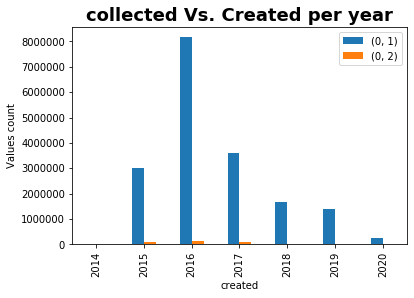

In [108]:
plt.figure(figsize=(8,5))
visitItems_by_date.unstack(level=0).plot(kind='bar')
plt.title('collected Vs. Created per year', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()
plt.show()
# plt.savefig('tools_id.png', dpi=300)

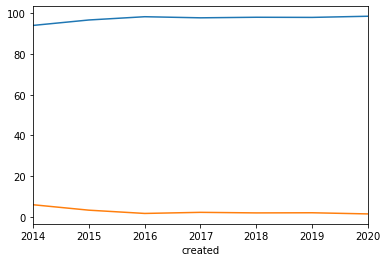

In [121]:
in_percentage['1%'].plot()
in_percentage['2%'].plot()


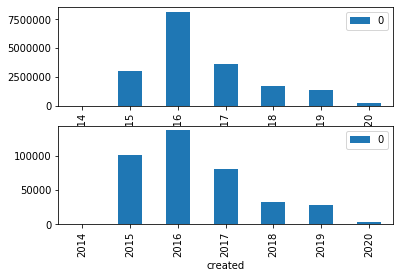

In [94]:
f, a = plt.subplots(2,1)
visitItems_by_date.xs(1).plot(kind='bar',ax=a[0])
visitItems_by_date.xs(2).plot(kind='bar',ax=a[1])

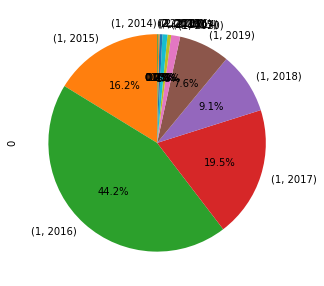

In [76]:
visitItems_by_date[0].plot.pie(y=0, figsize=(5, 5),autopct='%1.1f%%', startangle=90)

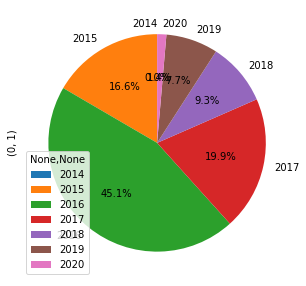

In [105]:
visitItems_by_date.unstack(level=0).plot.pie(y=0, figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues_r')
#together

## summerizing findings 

In [76]:
findings= [{'total_items_created_and_collected': '18,479,555','how_many_collected': '97.9%', 'how_many_created': '2.1%', 'average item per user': 74,'what_tools_were used_the_most_to_create': 'immersive room with 87,588'},
          {'what_tools_were used_the_most_to_create':'building with 50,871'}, 
          {'what_tools_were used_the_most_to_create':'chair with 50,392'}]

visitsItems_findings = pd.DataFrame(findings)
visitsItems_findings

,total_items_created_and_collected,how_many_collected,how_many_created,average item per user,what_tools_were used_the_most_to_create
0,"18,479,555",97.9%,2.1%,74.0,"immersive room with 87,588"
1,NaN,NaN,NaN,NaN,"building with 50,871"
2,NaN,NaN,NaN,NaN,"chair with 50,392"


In [77]:
in_percentage

NameError: name 'in_percentage' is not defined